In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Regression avec SKLearn :

In [2]:
np.random.seed(2)#  #important pour preserver les memes données générées à chaque execution


In [3]:
m = 100 # nombre d'échantillons on va créer 100 samples
X = np.linspace(0,10,m).reshape(m,1)
y = X**2 + np.random.randn(m,1) # y = X + V (random matrix (m,1) )
y = y.reshape(m,1)
pass

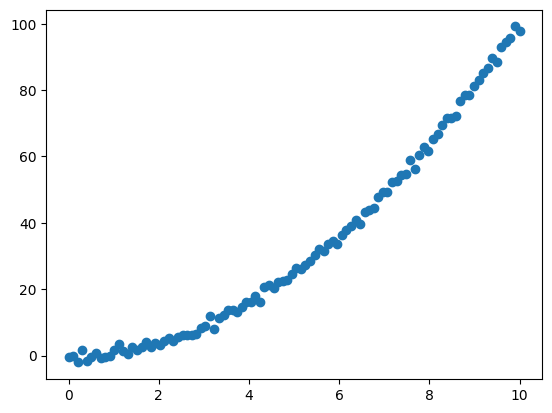

In [4]:
plt.scatter(X,y)

 ### Import du modèle linéaire SK Learn :

Les modèles sur Sickit-Learn sont sous forme de Classes d'objet :

In [5]:
from sklearn.svm import SVR

On crée un objet de classe SVR() et on lui passe les hyper-paramètres : 'class instanciation'


Le paramètre "C" détermine le compromis entre la précision de l'ajustement du modèle aux données d'entraînement et la régularisation du modèle pour éviter le surajustement (overfitting). Plus précisément, il contrôle la pénalité appliquée aux erreurs d'ajustement. Voici comment cela fonctionne :

Une valeur plus élevée de "C" permettra au modèle de s'ajuster plus étroitement aux données d'entraînement, ce qui peut conduire à une précision plus élevée sur ces données.

Une valeur plus faible de "C" introduira une régularisation plus forte, forçant le modèle à avoir une marge plus grande par rapport aux points de données d'entraînement, ce qui peut réduire le risque de surajustement.

Le choix approprié de la valeur de "C" dépendra de la nature de vos données et de vos objectifs de modélisation. Vous devrez généralement expérimenter différentes valeurs de "C" via une validation croisée pour trouver celle qui fonctionne le mieux pour votre problème de régression spécifique.

En résumé, le paramètre "C" dans SVR sklearn contrôle le compromis entre la précision de l'ajustement et la régularisation du modèle, ce qui peut avoir un impact significatif sur les performances de la régression.

In [6]:
model = SVR(C=100,kernel='poly',degree=2) #utilise la methode des moindres carrés
model.fit(X,y) #Fit linear model.
#entraîne le modèle en utilisant les données d'entraînement. 
# X représente vos caractéristiques (variables indépendantes) et 
# y représente vos étiquettes (variables dépendantes).
#  Le modèle ajustera les coefficients pour minimiser la somme 
# des carrés des résidus (méthode des moindres carrés).


model.score(X,y)  #Return the coefficient of determination of the prediction.
print(model.score(X,y))

# on prédit les valeurs de X avec le modèle entrainé.
predictions = model.predict(X)  #Predict using the linear model.



0.9988124081136078


c:\Users\choua\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


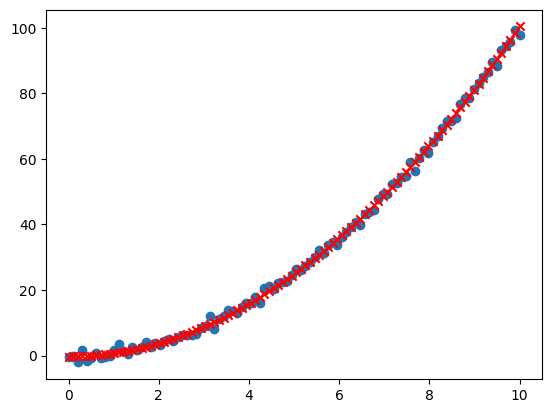

In [7]:
plt.scatter(X,y)
plt.scatter(X,predictions,c = 'r',marker='x')

### Affichage du modèle trouvé par la methode fit() pour un kernel linéaire :

_on cherche une forme polynomiale de degré 3 par exemple tel que y = a.x^3 + b.x^2 + c.x +d_

In [8]:
from sklearn.preprocessing import PolynomialFeatures

# Créez un objet PolynomialFeatures pour obtenir les caractéristiques polynomiales
poly = PolynomialFeatures(degree=3)

# Transformez les caractéristiques originales X en caractéristiques polynomiales
X_poly = poly.fit_transform(X)
print("x_poly = ",X_poly[:5])
print("X = ",X[:5],"\n\n")
y = y.ravel()#pour transformer le vecteur 1D en tableau 1D pour qu'il soit exploitable par le SVR

# Fit un modèle linéaire aux caractéristiques polynomiales pour obtenir les coefficients
lin_model = SVR(C=100, kernel='linear')
lin_model.fit(X_poly, y)

# Obtenez les coefficients du modèle linéaire ne marche qu'avec un kernel linear !
coef0 = lin_model.intercept_[0]
print(lin_model.coef_.reshape(len(lin_model.coef_[0]),1))
coef1 = lin_model.coef_[0][1]
coef2 = lin_model.coef_[0][2]
coef3 = lin_model.coef_[0][3]
print(coef3)
# Affichez l'expression du modèle sous forme de polynôme de degré 2
print("Expression du modèle (polynôme de degré 3) :")
print(f"y = {coef0:.2f} + {coef1:.2f} * X + {coef2:.2f} * X^2+ {coef3:.2f} * X^3 ")


# Générez les valeurs du polynôme de degré 2 pour l'affichage
poly_values = coef0 + coef1 * X + coef2 * (X**2) + coef3 * (X**3)




x_poly =  [[1.         0.         0.         0.        ]
 [1.         0.1010101  0.01020304 0.00103061]
 [1.         0.2020202  0.04081216 0.00824488]
 [1.         0.3030303  0.09182736 0.02782647]
 [1.         0.4040404  0.16324865 0.06595905]]
X =  [[0.       ]
 [0.1010101]
 [0.2020202]
 [0.3030303]
 [0.4040404]]
[[4.65547600e-11]
 [1.41420162e+00]
 [6.09699569e-01]
 [3.18904895e-02]]
0.03189048948115669
Expression du modèle (polynôme de degré 2) :
y = -1.56 + 1.41 * X + 0.61 * X^2+ 0.03 * X^3 


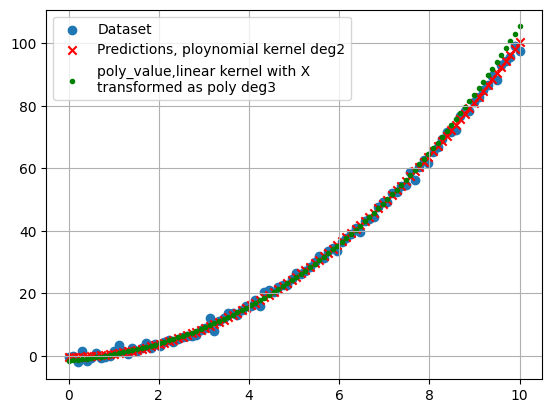

In [9]:
plt.scatter(X,y,label = 'Dataset')
plt.scatter(X,predictions,c = 'r',marker='x',label = 'Predictions, ploynomial kernel deg2')
plt.scatter(X,poly_values,c = 'g', marker = '.',label = 'poly_value,linear kernel with X \ntransformed as poly deg3')
plt.grid()
plt.legend()